# Notebook example

## Import python package for reading and plotting.

In [2]:
# This requires jupyter-matplotlib a.k.a. ipympl.
# ipympl can be install via pip or conda.
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})
import matplotlib.ticker as ticker
from matplotlib.ticker import ScalarFormatter
import numpy as np
np.seterr('raise')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

## Import pyrtlib package

In [3]:
from pyrtlib.atmp import AtmosphericProfiles as atmp
from pyrtlib.main import BTCloudRTE
from pyrtlib.utils import ppmv2gkg, mr2rh

In [4]:
atm = ['Tropical',
       'Midlatitude Summer',
       'Midlatitude Winter',
       'Subarctic Summer',
       'Subarctic Winter',
       'U.S. Standard']

Load standard atmosphere (low res at lower levels, only 1 level within 1 km) and define which absorption model will be used.

In [5]:
z, p, d, t, md = atmp.gl_atm(atmp.TROPICAL)
gkg = ppmv2gkg(md[:, atmp.H2O], atmp.H2O)
rh = mr2rh(p, t, gkg)[0] / 100

mdl = 'rose16'

## Performing brightness temperature calculation from satellite

Default calculatoin consideres no cloud

In [6]:
ang = np.array([90.])
frq = np.arange(20, 201, 1)
nf = len(frq)

Setup matplotlib plot

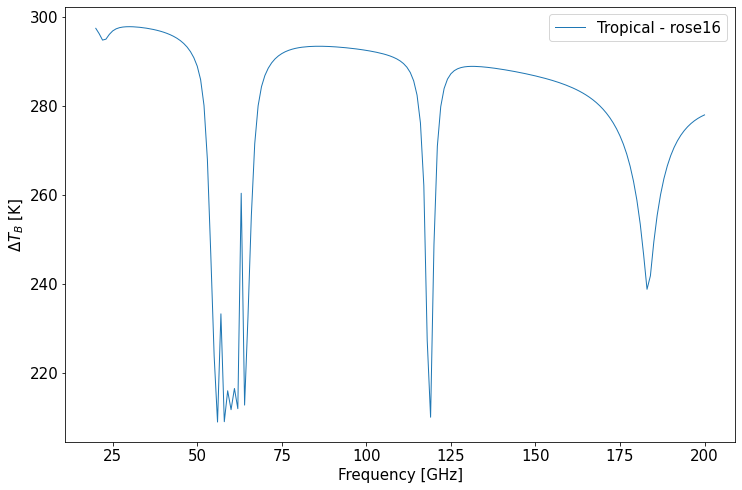

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))
ax.set_xlabel('Frequency [GHz]')
ax.set_ylabel('$\Delta {T_B}$ [K]')

rte = BTCloudRTE(z, p, t, rh, frq, ang)
rte.init_absmdl(mdl)
df = rte.execute()

df = df.set_index(frq)
df.tbtotal.plot(ax=ax, linewidth=1, label='{} - {}'.format(atm[atmp.TROPICAL], mdl))

ax.legend()
plt.show()

Print dataframe

In [8]:
df

,tbtotal,tbatm,tmr,tmrcld,tauwet,taudry,tauliq,tauice
20,297.391838,0.0,281.191287,0.0,0.120341,0.012855,0.0,0.0
21,296.186240,0.0,280.517137,0.0,0.188802,0.013524,0.0,0.0
22,294.748245,0.0,279.175653,0.0,0.261841,0.014259,0.0,0.0
23,294.953483,0.0,279.830575,0.0,0.257906,0.015066,0.0,0.0
24,296.027799,0.0,280.971991,0.0,0.202303,0.015954,0.0,0.0
...,...,...,...,...,...,...,...,...
196,275.997899,0.0,275.396235,0.0,3.672911,0.025784,0.0,0.0
197,276.611319,0.0,275.881854,0.0,3.459942,0.025956,0.0,0.0
198,277.129218,0.0,276.279020,0.0,3.289797,0.026129,0.0,0.0
199,277.566840,0.0,276.605436,0.0,3.152663,0.026302,0.0,0.0


## Performing calculation for `rose13` absorption model

In [9]:
mdl = 'rose03'
rte.init_absmdl(mdl)
df_rose03 = rte.execute()
df_rose03 = df_rose03.set_index(frq)

Add brigthness temperature values as new column

In [10]:
df['delta'] = df.tbtotal - df_rose03.tbtotal

In [11]:
df

,tbtotal,tbatm,tmr,tmrcld,tauwet,taudry,tauliq,tauice,delta
20,297.391838,0.0,281.191287,0.0,0.120341,0.012855,0.0,0.0,-0.009286
21,296.186240,0.0,280.517137,0.0,0.188802,0.013524,0.0,0.0,-0.082460
22,294.748245,0.0,279.175653,0.0,0.261841,0.014259,0.0,0.0,-0.204805
23,294.953483,0.0,279.830575,0.0,0.257906,0.015066,0.0,0.0,-0.120520
24,296.027799,0.0,280.971991,0.0,0.202303,0.015954,0.0,0.0,-0.005345
...,...,...,...,...,...,...,...,...,...
196,275.997899,0.0,275.396235,0.0,3.672911,0.025784,0.0,0.0,-0.175435
197,276.611319,0.0,275.881854,0.0,3.459942,0.025956,0.0,0.0,-0.166857
198,277.129218,0.0,276.279020,0.0,3.289797,0.026129,0.0,0.0,-0.158748
199,277.566840,0.0,276.605436,0.0,3.152663,0.026302,0.0,0.0,-0.151191


Scatter plot of rose16 vs rose03 BT

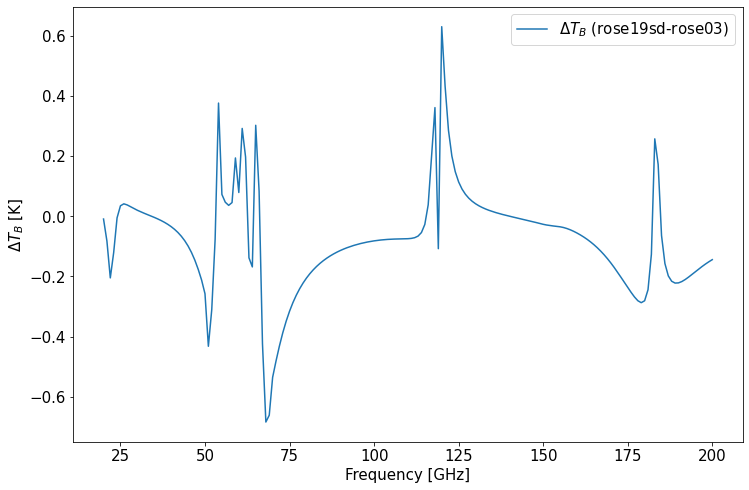

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))
ax.set_xlabel('Frequency [GHz]')
ax.set_ylabel('$\Delta {T_B}$ [K]')
df.delta.plot(ax=ax, figsize=(12,8), label='$\Delta {T_B}$ (rose19sd-rose03)')
ax.legend()
plt.show()

## Performing brightness temperature calculation from ground

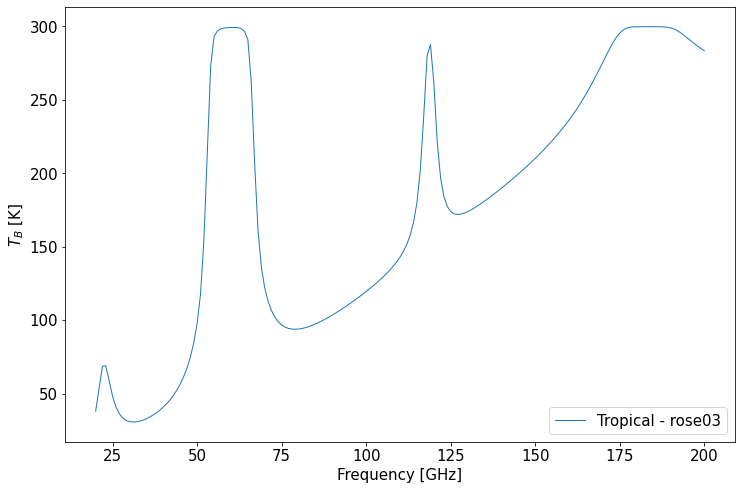

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))
ax.set_xlabel('Frequency [GHz]')
ax.set_ylabel('${T_B}$ [K]')

rte.satellite = False
df_from_ground = rte.execute()

df_from_ground = df_from_ground.set_index(frq)
df_from_ground.tbtotal.plot(ax=ax, linewidth=1, label='{} - {}'.format(atm[atmp.TROPICAL], mdl))
ax.legend()
plt.show()

In [16]:
df_from_ground

,tbtotal,tbatm,tmr,tmrcld,tauwet,taudry,tauliq,tauice
20,38.099772,36.105760,287.782612,0.0,0.119650,0.012748,0.0,0.0
21,53.601602,51.749102,287.549687,0.0,0.183266,0.013396,0.0,0.0
22,68.633178,66.917066,286.872667,0.0,0.249670,0.014107,0.0,0.0
23,68.964994,67.266539,287.380711,0.0,0.249859,0.014887,0.0,0.0
24,58.516993,56.752847,288.083540,0.0,0.201664,0.015745,0.0,0.0
...,...,...,...,...,...,...,...,...
196,290.020108,290.012638,297.081210,0.0,3.697410,0.025150,0.0,0.0
197,288.151852,288.142752,296.859200,0.0,3.486852,0.025315,0.0,0.0
198,286.380219,286.369597,296.671422,0.0,3.318854,0.025481,0.0,0.0
199,284.741567,284.729567,296.513552,0.0,3.183646,0.025648,0.0,0.0
